# GBDT

###### # -*- coding: utf-8 -*-
###### # @Time : 2022/4/21
###### # @EMAIL： duanyu@bjtu.edu.cn
###### # @Software: PyCharm

###### 编程实现GBDT算法对波士顿房价数据集进行回归，并绘图展示boosting迭代次数（横轴）与训练/测试误差（纵轴）的折线图。

In [4]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

data = load_boston()
X = data['data']
y = data['target']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

C:\Users\ASUS\anaconda3\envs\sklearn-env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California h

When n_estimators=50, train_MSE=2.941203516590663, test_MSE=10.094179712664863
When n_estimators=100, train_MSE=1.559878474884029, test_MSE=8.990990559078519
When n_estimators=150, train_MSE=0.8563692602725927, test_MSE=8.81501726333561
When n_estimators=200, train_MSE=0.5180281456811874, test_MSE=8.824366657107454
When n_estimators=250, train_MSE=0.3322678102250091, test_MSE=9.069816358989767
When n_estimators=300, train_MSE=0.21342838633158426, test_MSE=8.957733687214079
When n_estimators=350, train_MSE=0.13435918185999624, test_MSE=10.042784305251315
When n_estimators=400, train_MSE=0.09003257433111525, test_MSE=9.417590231104988
When n_estimators=450, train_MSE=0.05928444936729178, test_MSE=9.709377561896147
When n_estimators=500, train_MSE=0.040034135625672485, test_MSE=9.363877742822853
When n_estimators=550, train_MSE=0.027077743653649795, test_MSE=9.242290137712127
When n_estimators=600, train_MSE=0.018232149906807157, test_MSE=9.191982529126834
When n_estimators=650, train_MSE

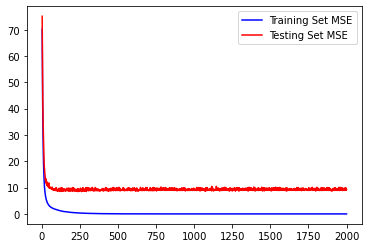

In [5]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error as msef
train_score=[]
test_score=[]

for i in range(1,2000+1):
    session = GradientBoostingRegressor(n_estimators=i)
    session = session.fit(X_train,y_train)
    train_score.append(msef(y_train,session.predict(X_train)))
    test_score.append(msef(y_test,session.predict(X_test)))
    if len(train_score)%50==0:
        print("When n_estimators={}, train_MSE={}, test_MSE={}".format(len(train_score),train_score[-1],test_score[-1]))
plt.plot(np.arange(2000)+1,train_score,'b-',label = "Training Set MSE")
plt.plot(np.arange(2000)+1,test_score,'r-',label = "Testing Set MSE")

plt.legend()
plt.show()